In [23]:
import pandas as pd

titanic_df = pd.read_csv('titanic.csv')
titanic_df.info()
print(titanic_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                           

In [24]:
print(titanic_df[['Fare','Parch','Survived','PassengerId']].dtypes)

titanic_df = titanic_df.dropna()
titanic_df['Fare'] = titanic_df['Fare'].astype(int)

print(titanic_df['Fare'].dtype)


Fare           float64
Parch            int64
Survived         int64
PassengerId      int64
dtype: object
int32


In [25]:
stats = titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].agg(['mean','median','std','min','max','quantile'])

stats.loc['1st_quartile'] = titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].quantile(0.25)
stats.loc['2nd_quartile'] = titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].quantile(0.50)
stats.loc['3rd_quartile'] = titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].quantile(0.75)
stats.loc['4th_quartile'] = titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].quantile(1.00)

print(stats)

                    Fare     Parch  Survived  PassengerId        Age     SibSp
mean           97.666667  0.482759  0.505747  1102.712644  39.247126  0.597701
median         71.000000  0.000000  1.000000  1094.000000  39.000000  1.000000
std            88.165894  0.860801  0.502865   126.751901  15.218730  0.637214
min             0.000000  0.000000  0.000000   904.000000   1.000000  0.000000
max           512.000000  4.000000  1.000000  1306.000000  76.000000  3.000000
quantile       71.000000  0.000000  1.000000  1094.000000  39.000000  1.000000
1st_quartile   35.000000  0.000000  0.000000   986.000000  27.000000  0.000000
2nd_quartile   71.000000  0.000000  1.000000  1094.000000  39.000000  1.000000
3rd_quartile  134.500000  1.000000  1.000000  1216.000000  50.000000  1.000000
4th_quartile  512.000000  4.000000  1.000000  1306.000000  76.000000  3.000000


In [26]:
stats = titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].agg(['mean','median','std'])

stats.loc['1st_quartile'] = titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].quantile(0.25)

stats.loc['3rd_quartile'] = titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].quantile(0.75)


print(stats)

                    Fare     Parch  Survived  PassengerId        Age     SibSp
mean           97.666667  0.482759  0.505747  1102.712644  39.247126  0.597701
median         71.000000  0.000000  1.000000  1094.000000  39.000000  1.000000
std            88.165894  0.860801  0.502865   126.751901  15.218730  0.637214
1st_quartile   35.000000  0.000000  0.000000   986.000000  27.000000  0.000000
3rd_quartile  134.500000  1.000000  1.000000  1216.000000  50.000000  1.000000


In [27]:
# outliers - outer values from lower and upped bound 

import pandas as pd
def detect_and_remove_outliers(data, variables):
    outliers_dict = {}
    outlier_indices = set()
    
    for variable in variables:
        Q1 = data[variable].quantile(0.25)
        Q3 = data[variable].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
        outliers_dict[variable] = outliers[[variable]]
        outlier_indices.update(outliers.index)
    cleaned_data = data.drop(outlier_indices)   
    return outliers_dict, cleaned_data

variables_to_check = ['Age', 'Fare', 'Parch', 'SibSp']
outliers_selected, titanic_df_cleaned = detect_and_remove_outliers(titanic_df, variables_to_check)
for variable, outliers in outliers_selected.items():
    print(f"Outliers in {variable}:\n{outliers}\n")



Outliers in Age:
Empty DataFrame
Columns: [Age]
Index: []

Outliers in Fare:
     Fare
343   512

Outliers in Parch:
     Parch
24       3
69       4
142      3
178      3

Outliers in SibSp:
    SibSp
53      3



In [28]:
mode_values = titanic_df[['Pclass','Sex','Embarked']].mode()
print(mode_values)

mode_values = titanic_df['Pclass'].mode()
print(mode_values)

mode_value = titanic_df['Embarked'].mode()
print(mode_value)


   Pclass     Sex Embarked
0       1  female        C
0    1
Name: Pclass, dtype: int64
0    C
Name: Embarked, dtype: object


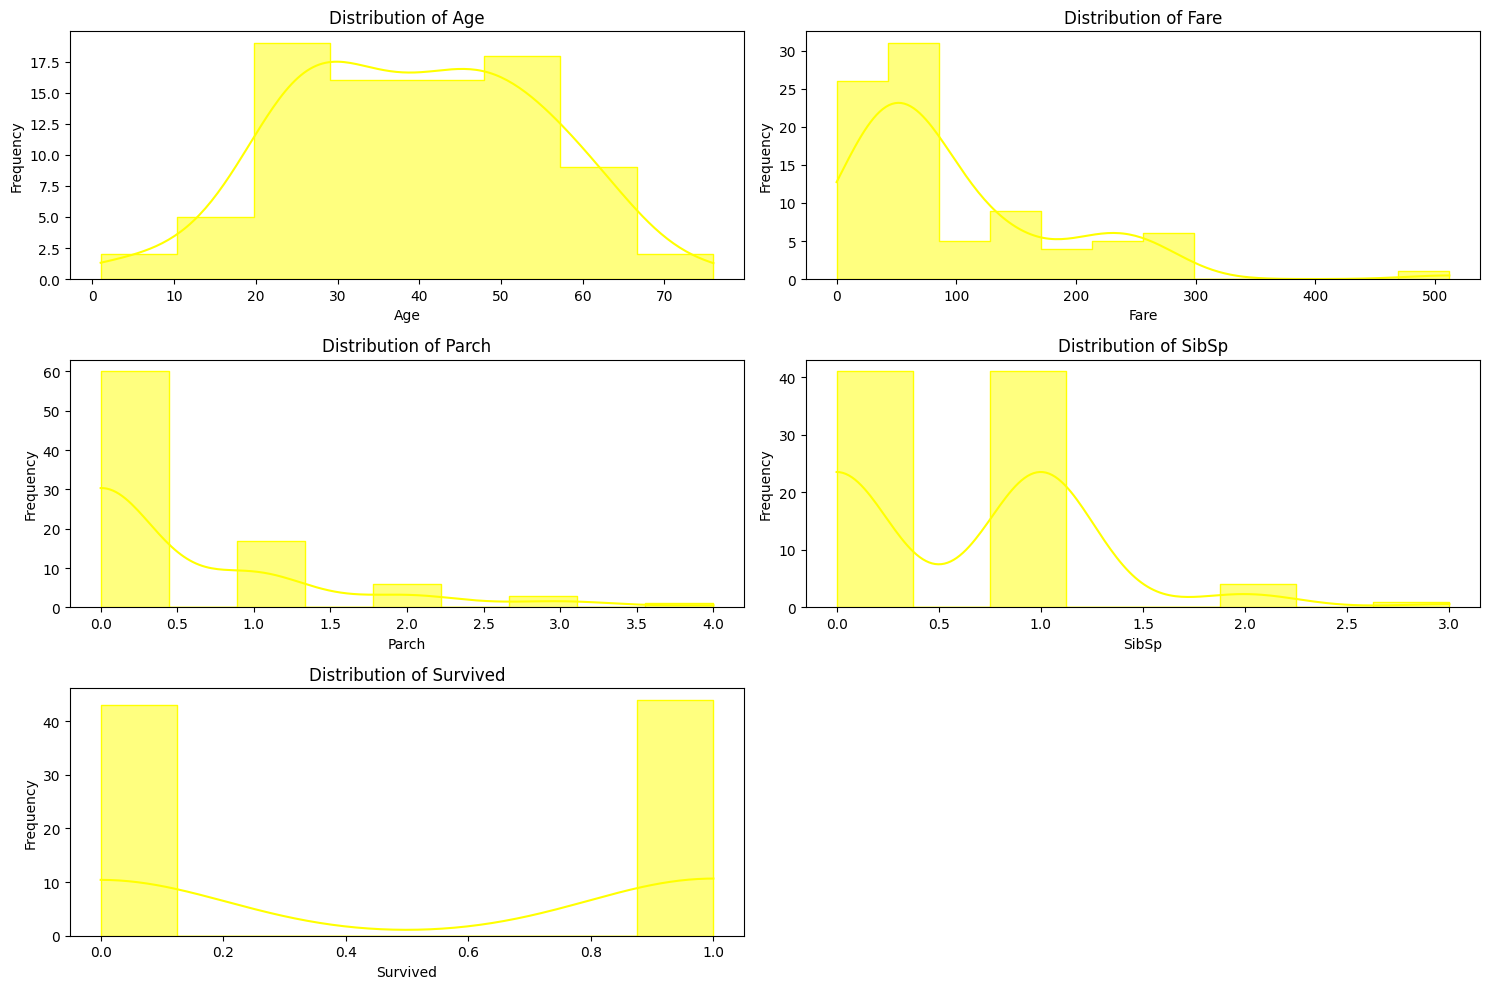

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['Age','Fare','Parch','SibSp','Survived']

plt.figure(figsize=(15,10))
for i,var in enumerate(variables,1):
    plt.subplot(3,2,i)
    sns.histplot(titanic_df[var].dropna(),kde=True,color='yellow',element='step')
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

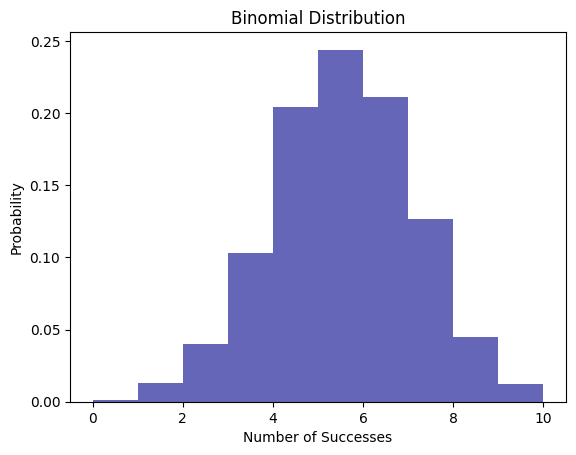

In [30]:
import numpy as np 
import matplotlib.pyplot as plt

n,p = 10,0.5

data = np.random.binomial(n,p,1000)

plt.hist(data,bins=10,density=True,alpha=0.6,color='darkblue')
plt.title('Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()


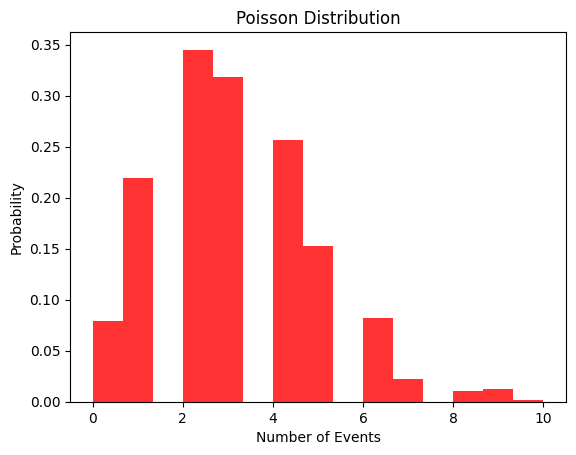

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

lam = 3

data = np.random.poisson(lam,1000)

plt.hist(data,bins=15,density=True,alpha=0.8,color='red')
plt.title('Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()


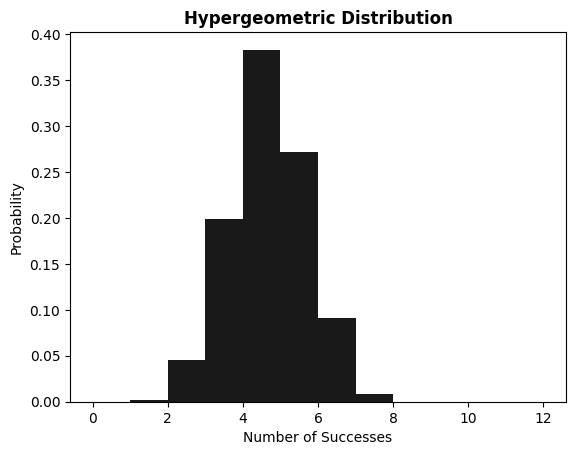

In [32]:
import numpy as np 
import matplotlib.pyplot as plt

N,K,n = 20,7,12

data = np.random.hypergeometric(K,N-K,n,1000)


plt.hist(data,bins=range(n+1),density=True,alpha=0.9,color='black')
plt.title('Hypergeometric Distribution',fontweight='bold')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()


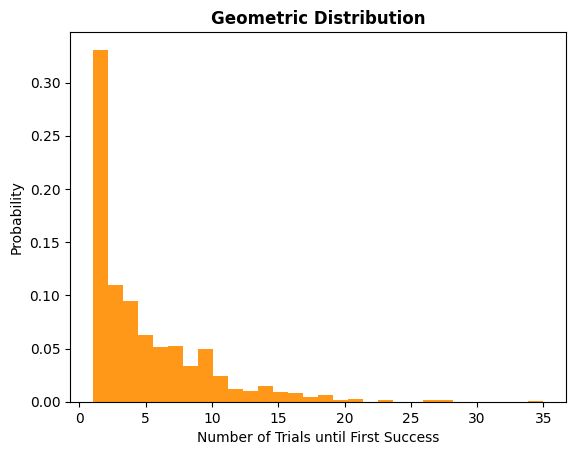

In [33]:
import numpy as np 
import matplotlib.pyplot as plt

p=0.2
data = np.random.geometric(p,1000)

plt.hist(data,bins=30,density=True,alpha=0.9,color='darkorange')
plt.title('Geometric Distribution',fontweight='bold')
plt.xlabel('Number of Trials until First Success')
plt.ylabel('Probability')
plt.show()
